This notebook contains visualization work from the MSU grades data set. We explore major mean GPA as well as inidividual course distributions over time

## Cleaning data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

grades_final = pd.read_csv('new_grades_statistics')

grades_final['date'] =  pd.to_datetime(grades_final['date'])




In [2]:
probability_lists = []
# There are 46,191 courses included in the dataframe

# we are essentially looping through each course in the dataframe and pulling
# that respectives courses frequency letter-grade distribution into a list for later analysis
for i in range(46191):
    if i == 0:
        probability_lists.append(grades_final['probability'][:8].values)
    else:
        probability_lists.append(grades_final['probability'][i * 8:8 * (i+1)].values)
        


In [3]:
# creating a new column that is the grade distribution

grades_final['gpa_grade_values'] = [[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]] * len(grades_final)

In [4]:
# dropping all unique instances

# effectively converting data from long format to wide format

grades_final = grades_final.drop_duplicates('unique_course_name')


In [5]:
# creating new column of each course's unique grade distribution or probability list

grades_final["probability_lists"] = probability_lists

In [6]:
# fixing the index

grades_final = grades_final.reset_index()

grades_final = grades_final.drop('index', axis = 1)

#grades_final = grades_final.drop(['probability', 'count', 'level_0'], axis = 1)


In [7]:
# final output

grades_final.head()

,date,unique_course_name,semester,subject_code,course_title,instructors,total_grades,course_name,letter_grade,count,probability,mean,mode,median,skew,std,kurt,gpa_grade_values,probability_lists
0,2014-12-15,AAAS_100__FS14___YOMAIRA C FIGUEROA,FS14,AAAS,Race and Community,YOMAIRA C FIGUEROA,24,AAAS_100,4.0,7,0.291667,2.875000,4.0,3.0,-1.182836,1.174823,3.597992,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.2916666666666667, 0.16666666666666666, 0.16..."
1,2015-12-15,AAAS_100__FS15___YOMAIRA C FIGUEROA,FS15,AAAS,Race and Community,YOMAIRA C FIGUEROA,35,AAAS_100,4.0,11,0.314286,3.128571,3.5,3.5,-1.633707,1.064645,5.011626,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.3142857142857143, 0.3428571428571429, 0.114..."
2,2016-12-15,AAAS_100__FS16___XHERCIS MENDEZ,FS16,AAAS,Race and Community,XHERCIS MENDEZ,41,AAAS_100,4.0,18,0.439024,3.512195,4.0,3.5,-1.891232,0.619675,7.496914,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.4390243902439024, 0.3414634146341464, 0.097..."
3,2017-12-15,AAAS_100__FS17___XHERCIS MENDEZ,FS17,AAAS,Race and Community,XHERCIS MENDEZ,40,AAAS_100,4.0,24,0.600000,3.600000,4.0,4.0,-1.339202,0.583095,3.769031,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.6, 0.15, 0.15, 0.05, 0.05, 0.0, 0.0, 0.0]"
4,2018-12-15,AAAS_100__FS18___TAMARA T BUTLER,FS18,AAAS,Race and Community,TAMARA T BUTLER,35,AAAS_100,4.0,13,0.371429,3.285714,4.0,3.5,-2.332432,1.077601,7.489730,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.37142857142857133, 0.37142857142857133, 0.1..."


After the data is cleaned, we will now start to analyze an individual distribution with hopes to understand more  statistics relating to the mean of the distribution

Lets start with this course, CMSE 202 taught by Yang Yang

In [8]:
# grouping the data so that each course and instructor is a unique list. This makes the analysis much easier



cmse_grades = grades_final[grades_final['subject_code'].isin(['CMSE'])]

cmse_grades = cmse_grades.drop(['letter_grade', 'probability', 'count'], axis = 1)


In [9]:
# pulling CMSE's grade frequency probability lists

cmse_class_instruc = list(cmse_grades.groupby(['instructors', 'course_name']).probability_lists)

gpa_dist = np.array([4, 3.5, 3, 2.5, 2, 1.5, 1, 0]) # posssible gpa dist




def normalize_gpa_dist(x):
    '''This funcion simply aggregates and normalizes a teacher's
    course distributions. If the same teacher taught the same course,
    it sums their respective distributions together, then divides by
    number of courses to normalize '''
    inital_normalized_dists = []
    for i in range(len(x)):
        number_of_courses = len(x[i][1])
        
        # summing distributions together
        
        distribution_sum = np.sum(x[i][1].values)
        
        
        # normalizng by dividing by the number of courses taught 
        
        
        normalized_dist = distribution_sum / number_of_courses
        
        inital_normalized_dists.append([x[i][0], normalized_dist])
        
    return inital_normalized_dists
        
cmse_normalized_dists = normalize_gpa_dist(cmse_class_instruc)

In [10]:
# this code simply allows you to easily find Yang Yang CMSE 202 as an instructor 

inital_teacher_list = []
for i in range(len(cmse_class_instruc)):
    inital_teacher_list.append(cmse_class_instruc[i][0])
        

cmse_202_yang = inital_teacher_list.index(('YANG YANG', 'CMSE_202'))

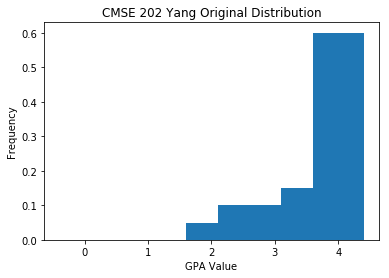

In [11]:

plt.bar(gpa_dist, cmse_normalized_dists[31][1])
plt.xlabel('GPA Value')
plt.ylabel('Frequency')
plt.title('CMSE 202 Yang Original Distribution')
plt.savefig('yang original gpa.png')

Obviously this distribution is not very helpful or insightful. Because we only have one sample, we can generate more samples through bootstrapping. Bootstrapping is sampling with replaement. This is a robust method that allows us to generate a confidience interval of mean GPAs.

CMSE 202 Mean GPA 95% CI 3.45 - 3.7


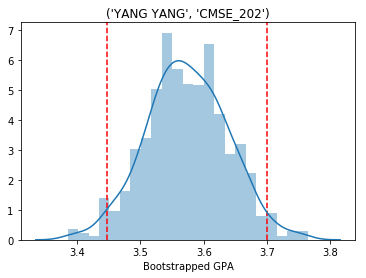

In [12]:

from scipy import stats
import seaborn as sns




def mean_bootstrapper(x, index = 1):
    '''This function  generates 100 random samples with replacement from a normalized distribution 
    it then calculates the mean then stores it in a array. 
    Finally, the mean of those means as well as the standard
    deviation is calculated in order to calculate a confidence
    Interval'''
    boot_strapped_means = np.array([np.mean(np.random.choice(gpa_dist, size = 100, p = x[index].flatten())) for i in range(1000)])

    mean_of_bootstrap = np.mean(boot_strapped_means)

    sigma_of_bootstrap = np.std(boot_strapped_means)

    # calculating confidence interval for Yang
    ci_bootstrap = stats.norm.interval(0.95, loc=mean_of_bootstrap, scale=sigma_of_bootstrap)
    
    return boot_strapped_means, ci_bootstrap



cmse_bootstrapped_means, cmse_ci = mean_bootstrapper(cmse_normalized_dists[cmse_202_yang])



#plt.hist(boot_strapped_means)
plt.title(cmse_normalized_dists[cmse_202_yang][0])
plt.axvline(cmse_ci[0], color = 'r', linestyle = "dashed")
plt.axvline(cmse_ci[1], color = 'r', linestyle = "dashed")
plt.xlabel("Bootstrapped GPA")
sns.distplot(cmse_bootstrapped_means, hist = True, norm_hist = True)
print("CMSE 202 Mean GPA 95% CI", round(cmse_ci[0],2), "-", round(cmse_ci[1],2))
plt.savefig('Yang CMSE Dist')


The techinque and code above could be used as an interesting way to compare difficulty of different teachers. However, this is not very useful to determine overall trends. Lets try to generate this confidence interval using every couse at MSU offered to try and determine a confidence interval for all MSU students.

In [13]:
all_msu_grades = grades_final.drop(['letter_grade', 'probability', 'count'], axis = 1)


all_msu_class_instruc = list(all_msu_grades.groupby(['instructors', 'course_name']).probability_lists)


In [14]:
all_msu_normalized_gpa = normalize_gpa_dist(all_msu_class_instruc)

list_of_prob_list_all_msu = []
for i in range(len(all_msu_normalized_gpa)):
    list_of_prob_list_all_msu.append(all_msu_normalized_gpa[i][1])

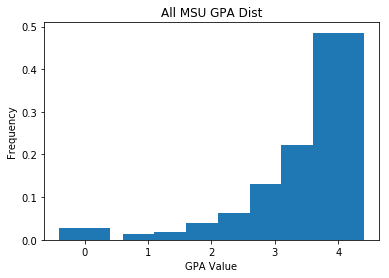

In [15]:
final_all_msu_prob_dist = np.sum(np.array(list_of_prob_list_all_msu), axis = 0) / len(list_of_prob_list_all_msu)

plt.bar(gpa_dist, final_all_msu_prob_dist)
plt.xlabel('GPA Value')
plt.ylabel('Frequency')
plt.title('All MSU GPA Dist')
plt.savefig('All MSU original dist.png')

All MSU Mean GPA 95% CI 3.21 - 3.56


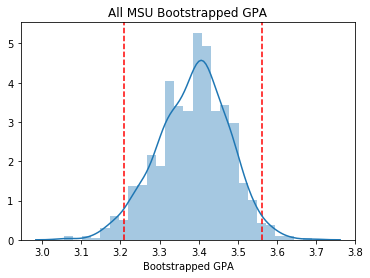

In [16]:
all_msu_bootstrapped_means, all_msu_ci = mean_bootstrapper(final_all_msu_prob_dist, index = True)



plt.title("All MSU Bootstrapped GPA")
plt.axvline(all_msu_ci[0], color = 'r', linestyle = "dashed")
plt.axvline(all_msu_ci[1], color = 'r', linestyle = "dashed")
plt.xlabel("Bootstrapped GPA")
sns.distplot(all_msu_bootstrapped_means, hist = True, norm_hist = True)
print("All MSU Mean GPA 95% CI", round(all_msu_ci[0],2), "-", round(all_msu_ci[1],2))
plt.savefig('All MSU dist bootsrap.png')

From the chart below, we can see that from 2011 to 2018, 95% percent of the students gpa was between 3.21 to 3.56.

# After learning more about the grade distributions, let us next step to individual major difficulty

In the following cells below we clean the data further to only contain classes with greater than 15 classes

We then group the data and plot average major gpa for each major with greater than 20 observations
(i.e.) we considered looking at the major if it had been around for over 20 semesters. Sadly, CMSE was not included.

Plotting Major GPA by mean was done to try and see if certain majors severly trended up over the years.

In [17]:
# J. Sheehan

# sorting data to only include data greater than a total of 15 students

mask = grades_final['total_grades'] > 15
masked = grades_final[mask]
refined_data = masked.sort_values('date')
refined_data = refined_data.reset_index()
probability = refined_data['probability_lists']
total_grades = refined_data['total_grades']
fail = [] 
perfect = []
step = 0
for plist in probability_lists:
    four = plist[0]
    fails = plist[-1]+plist[-2]+plist[-3]
    fail.append(fails)
    perfect.append(four)
print(len(fail))
print(len(perfect))
refined_data

46191
46191


,index,date,unique_course_name,semester,subject_code,course_title,instructors,total_grades,course_name,letter_grade,count,probability,mean,mode,median,skew,std,kurt,gpa_grade_values,probability_lists
0,19685,2011-12-15,IAH_241F__FS11___KENNETH W HARROW,FS11,IAH,Traditions in World Art (I),KENNETH W HARROW,17,IAH_241F,4.0,4,0.235294,2.911765,4.0,3.0,-1.343977,1.046497,4.479081,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.2352941176470588, 0.17647058823529413, 0.23..."
1,17608,2011-12-15,HST_150__FS11___ALAN FISHER,FS11,HST,World History since 1500,ALAN FISHER,103,HST_150,4.0,64,0.621359,3.373786,4.0,4.0,-1.886025,1.046767,5.942200,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.6213592233009708, 0.07766990291262135, 0.09..."
2,26008,2011-12-15,ME_444__FS11___HAROLD J SCHOCK,FS11,ME,Automotive Engines,HAROLD J SCHOCK,45,ME_444,4.0,14,0.311111,3.155556,4.0,3.0,-1.314641,0.794580,6.310216,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.3111111111111111, 0.13333333333333333, 0.28..."
3,22615,2011-12-15,KIN_250__FS11___V D ULIBARRI,FS11,KIN,Measurement in Kinesiology,V D ULIBARRI,172,KIN_250,4.0,14,0.081395,2.110465,2.5,2.5,-0.328462,1.201746,2.195153,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.08139534883720931, 0.11046511627906977, 0.1..."
4,43366,2011-12-15,THR_350__FS11___RYAN J DAVIES | ROBERT J ROZNO...,FS11,THR,Plays as Film,RYAN J DAVIES | ROBERT J ROZNOWSKI,62,THR_350,4.0,30,0.483871,3.322581,4.0,3.5,-1.467246,0.875734,5.113766,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.4838709677419355, 0.14516129032258066, 0.14..."
5,8974,2011-12-15,CSS_442__FS11___PHIL ROBERTSON,FS11,CSS,Agricultural Ecology,PHIL ROBERTSON,27,CSS_442,4.0,9,0.333333,3.555556,3.5,3.5,-0.656195,0.392837,3.069600,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.3333333333333333, 0.4814814814814815, 0.148..."
6,43358,2011-12-15,THR_341__FS11___MARK W COLSON,FS11,THR,Beginning Play Directing,MARK W COLSON,23,THR_341,4.0,19,0.826087,3.804348,4.0,4.0,-3.993630,0.620994,18.097841,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.8260869565217391, 0.13043478260869565, 0.0,..."
7,39981,2011-12-15,STT_886__FS11___ANITA D BEHME,FS11,STT,Stochastic Processes & App,ANITA D BEHME,34,STT_886,4.0,17,0.500000,3.647059,4.0,4.0,-0.569971,0.393503,1.834556,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.5, 0.29411764705882354, 0.2058823529411765,..."
8,34823,2011-12-15,PLS_324__FS11___DANIEL J LEE,FS11,PLS,American Legislative Process,DANIEL J LEE,73,PLS_324,4.0,16,0.219178,3.068493,3.0,3.0,-1.149045,0.799465,4.868322,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.2191780821917808, 0.2191780821917808, 0.301..."
9,31560,2011-12-15,MUS_873__FS11___CHARLES H RUGGIERO | LEIGH A V...,FS11,MUS,Early 20th Century Techniques,CHARLES H RUGGIERO | LEIGH A VANHANDEL,20,MUS_873,4.0,7,0.350000,3.425000,4.0,3.5,-0.804608,0.553963,3.070989,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.35, 0.3, 0.25, 0.05, 0.05, 0.0, 0.0, 0.0]"


In [18]:
grouped = refined_data.groupby(['subject_code','date','instructors'])
means = grouped['mean'].describe()

In [19]:
# the reason for including subject_code_list awkwardly like this instead of a .unique() method is because there is a 
# strange formating issue with the data

subject_code_list = ['AAAS', 'AAE', 'ABM', 'ACC', 'ACM', 'ACR', 'ADV', 'AEC', 'AESC',
       'AE', 'AFRE', 'AIIS', 'AL', 'AMS', 'ANP', 'ANR', 'ANS',
       'ANTR', 'ARB', 'ASN', 'AST', 'AS', 'ATD', 'AT', 'BE', 'BLD', 'BMB',
       'BME', 'BS', 'BUS', 'CAS', 'CEM', 'CEP', 'CE', 'CHE', 'CHS', 'CJ',
       'CLA', 'CLS', 'CMP', 'CMSE', 'COM', 'CSD', 'CSE', 'CSS', 'CSUS',
       'DAN', 'EAD', 'ECE', 'ECSP', 'EC', 'ED', 'EEM', 'EEP', 'EGR',
       'ENE', 'ENG', 'ENT', 'EPI', 'ESA', 'ESL', 'ESP', 'FIM', 'FI',
       'FLM', 'FLT', 'FOR', 'FRN', 'FSC', 'FW', 'GBL', 'GD',
       'GEO', 'GLG', 'GRM', 'GSAH', 'HA', 'HB', 'HDFS', 'HEB', 'HM',
       'HNF', 'HRLR', 'HRT', 'HST', 'IAH', 'IBIO', 'IDES', 'IM', 'ISB',
       'ISE', 'ISP', 'ISS', 'ITL', 'ITM', 'JPN', 'JRN', 'KIN', 'KOR',
       'LA', 'LB', 'LCS', 'LIN', 'LIR', 'LLT', 'LL', 'LTN', 'MBA', 'MC',
       'ME', 'MGT', 'MI', 'MKT', 'MMG', 'MSE', 'MS', 'MTHE', 'MTH',
       'MUSM', 'MUS', 'NEU', 'NOP', 'NSC', 'NUR', 'OST', 'PDC', 'PDI',
       'PHL', 'PHM', 'PHY', 'PIM', 'PKG', 'PLB', 'PLP', 'PLS', 'PPL',
       'PRR', 'PRT', 'PSL', 'PSY', 'RAD', 'RCAH', 'REL', 'RET',
       'RUS', 'SCM', 'SCS', 'SME', 'SOC', 'SPN', 'SSC', 'STA', 'STT',
       'SW', 'TC', 'TE', 'THR', 'TSM', 'UGS', 'UP', 'VM', 'WRA', 'WS', 'ZOL']

In [20]:
# finishing creating dataframe

df_course_list = []
for course_code in subject_code_list:    
    test = means.loc[str(course_code)]
    dates = []
    #for i in test.index[0]:
    for i in range(len(test)):
        indeces = test.index[i][0]
        dates.append(indeces)
    df = pd.DataFrame({'dates':dates,'mean':test['mean'], 'course': course_code})
    df_course_list.append(df)




In [21]:
df_course_list_grouped = []
for i in df_course_list:
    df_course_list_grouped.append(i.groupby(['date', 'course']).mean().reset_index())
    

df_course_list_grouped[0]

,date,course,mean
0,2014-12-15,AAAS,2.875000
1,2015-12-15,AAAS,3.128571
2,2016-05-15,AAAS,3.309524
3,2016-12-15,AAAS,3.631098
4,2017-12-15,AAAS,3.600000
5,2018-05-15,AAAS,3.588235
6,2018-12-15,AAAS,3.285714


In [22]:
# creating dictinoary of all subject codes and grouped dataframe for easier sorting

df_dict_course_means = dict(zip(subject_code_list, df_course_list_grouped))


In [23]:
# retreiving group names for indexing later 

course_list_names = []
    
for i in df_dict_course_means:    
    course_list_names.append(i)

In [24]:
# indexing dictionary for courses that have most recent date as well as greater than 20 observations


df_updated_dict_course_means = []
success_course_list = []
for i in course_list_names:
    intermedate_dict_major = df_dict_course_means[str(i)]
    if df_dict_course_means[str(i)]['date'].values[-1] == np.datetime64('2018-12-15T00:00:00.000000000') and len(intermedate_dict_major['date'].values) >= 20:
        df_updated_dict_course_means.append(intermedate_dict_major)
        success_course_list.append(i)
        
df_updated_dict_course_means
success_course_list

df_dict_course_means = dict(zip(success_course_list, df_updated_dict_course_means))




/Users/austinader/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


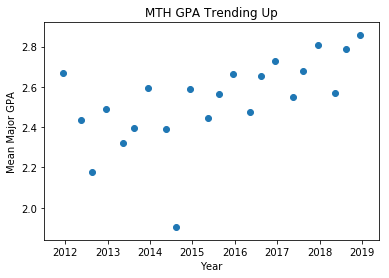

In [25]:
# the code below loops through each major and calculates two important statistics.
# 1. percent increase in average gpa = (last three mean values - first three mean values) / first three mean values
# 2. standard deviation of GPA over the last twenty semesters

mean_percent_increase = []
most_volitile = []
overall_mean = []
for i in df_dict_course_means:
    intermediate_test = df_dict_course_means[str(i)].iloc[:,[2]].values.flatten()
    
    first_mean = intermediate_test[0]
    last_mean = intermediate_test[-1]
    
#     mean_percent_increase.append((last_mean - first_mean) / first_mean)
    first_vals = np.ma.average([intermediate_test[0],intermediate_test[1], intermediate_test[2]])
    
    last_vals = np.ma.average([intermediate_test[-3], intermediate_test[-2], intermediate_test[-1]])
    
    mean_percent_increase.append((last_vals - first_vals) / first_vals)
    
    most_volitile.append(np.std(intermediate_test))
    
    overall_mean.append(np.mean(intermediate_test))

#df_dict_course_means[np.argmax(mean_percent_increase)]

trending_easiest_major = df_dict_course_means[success_course_list[np.argmax(mean_percent_increase)]]

trending_hardest_major = df_dict_course_means[success_course_list[np.argmin(mean_percent_increase)]]

most_risky_major = df_dict_course_means[success_course_list[np.argmin(most_volitile)]]

plt.scatter(trending_easiest_major['date'], trending_easiest_major['mean'])
plt.title(trending_easiest_major['course'][0])
plt.xlabel('Year')
plt.ylabel('Mean Major GPA')
plt.title('MTH GPA Trending Up')

plt.savefig("MTH Trending Up.png")


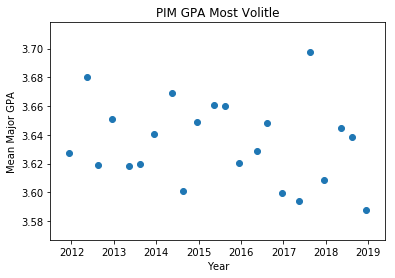

In [26]:
plt.scatter(most_risky_major['date'], most_risky_major['mean'])
plt.title(most_risky_major['course'][0])
plt.xlabel('Year')
plt.ylabel('Mean Major GPA')
plt.title('PIM GPA Most Volitle')
plt.savefig("PIM most volitile.png")

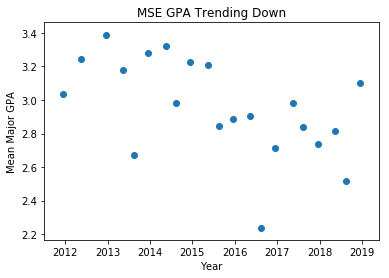

In [27]:
plt.scatter(trending_hardest_major['date'], trending_hardest_major['mean'])
plt.title(trending_hardest_major['course'][0])
plt.xlabel('Year')
plt.ylabel('Mean Major GPA')
plt.title('MSE GPA Trending Down')
plt.savefig("MSE Trending Down.png")


As you can see from the plots above, Math was the major that got the most easiest since 2011, by almost .6 points. Over a letter grade!

MSE (Chemical Engineering and material sciene) got the most hardest. Perhaps because of the increased trend of people trying to become petroleum engineers due to high starting salary

And, PIM (program in integrative management, business), was the most volitile. However, note how high the GPA's are, about an average of 3.5

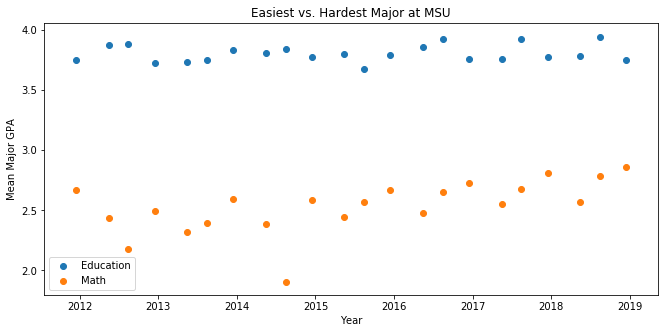

In [28]:
overall_easiest_major = df_dict_course_means[success_course_list[np.argmax(overall_mean)]]

overall_hardest_major = df_dict_course_means[success_course_list[np.argmin(overall_mean)]]

plt.figure(figsize=(11,5))
plt.scatter(overall_easiest_major['date'], overall_easiest_major['mean'], label = 'Education')
plt.scatter(overall_hardest_major['date'], overall_hardest_major['mean'], label = 'Math')
plt.xlabel('Year')
plt.ylabel('Mean Major GPA')
plt.title('Easiest vs. Hardest Major at MSU')
plt.legend()
plt.savefig("Easiest vs. Hardest Major MSU.png")


In [29]:
print('Education 10 year mean,', np.round(np.mean(overall_easiest_major['mean']), 3))
print('Math 10 year mean,', np.round(np.mean(overall_hardest_major['mean']), 3))

Education 10 year mean, 3.806
Math 10 year mean, 2.534


Finally we can see above the two extremes of majors at MSU.

/Users/austinader/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


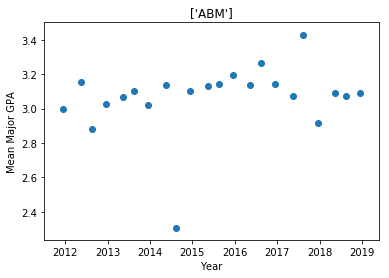

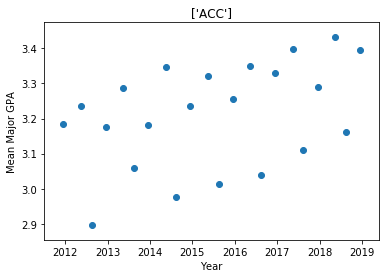

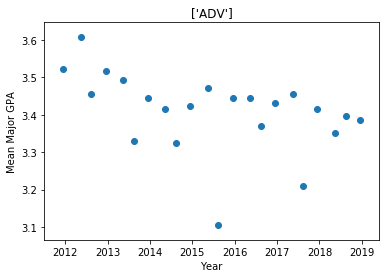

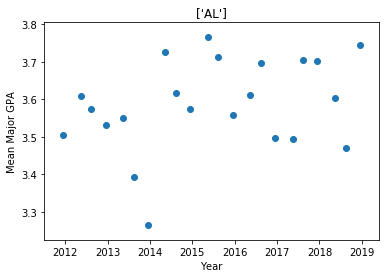

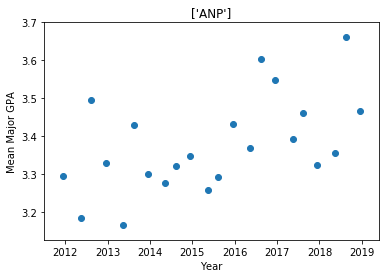

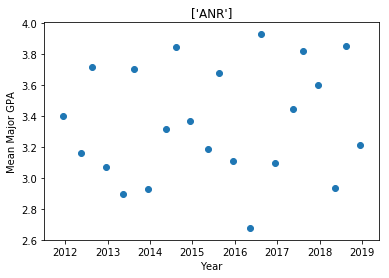

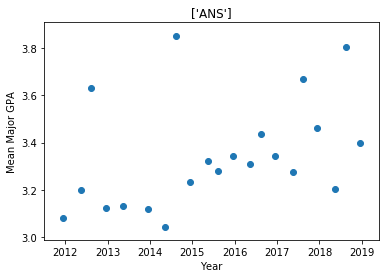

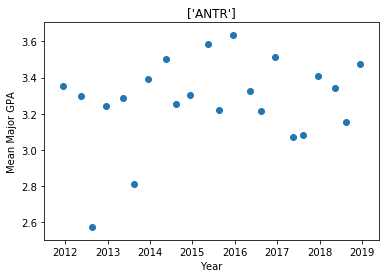

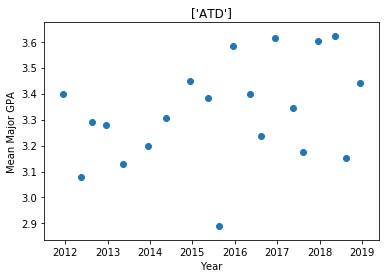

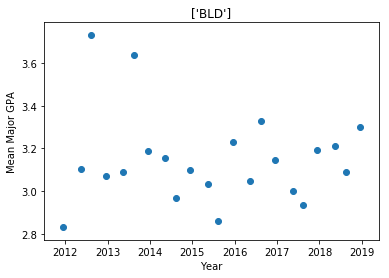

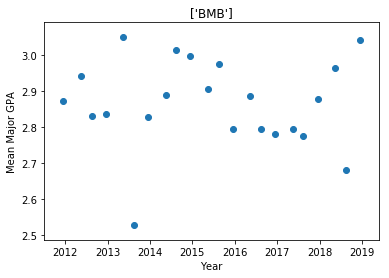

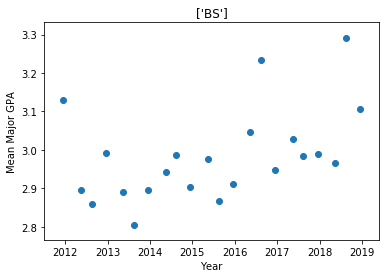

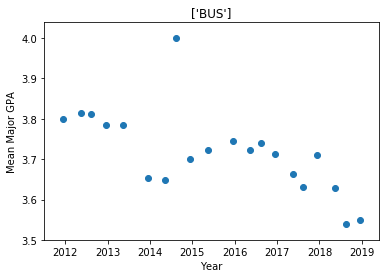

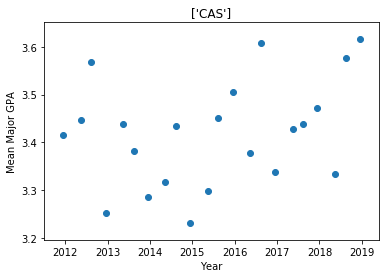

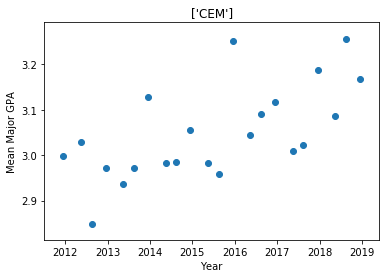

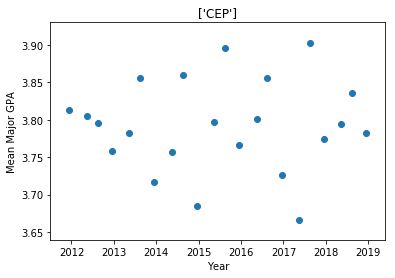

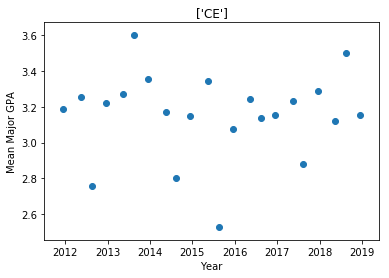

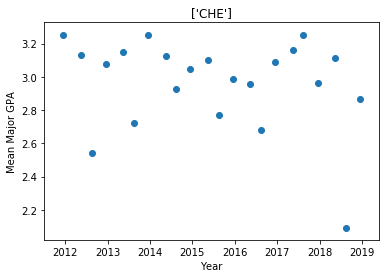

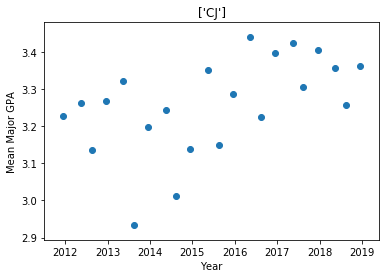

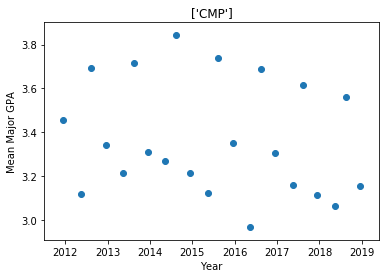

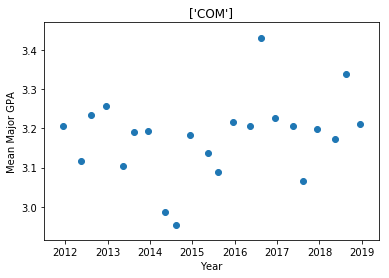

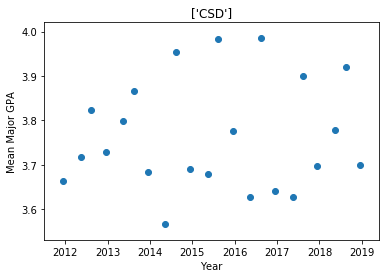

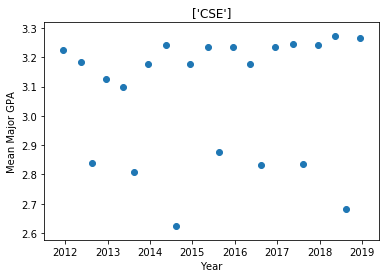

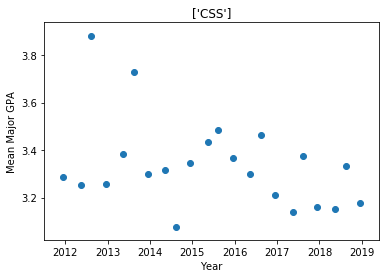

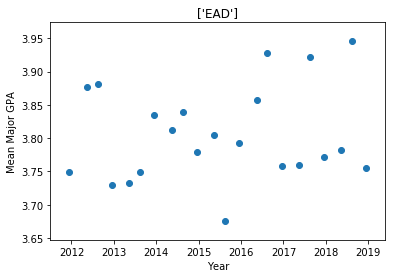

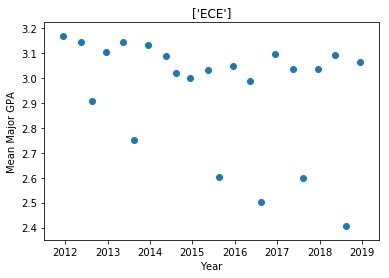

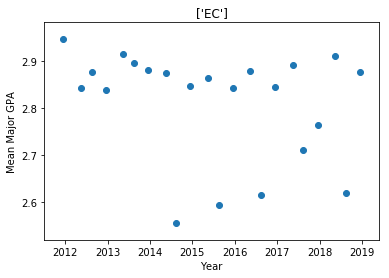

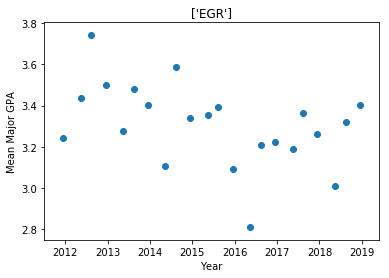

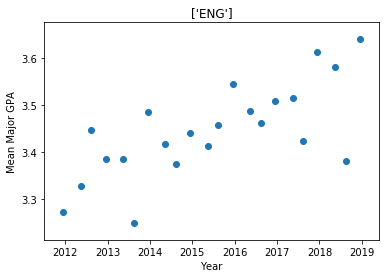

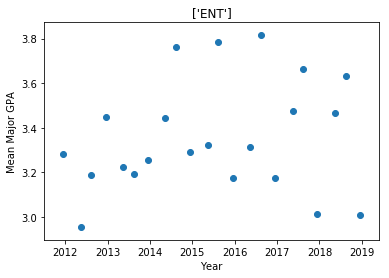

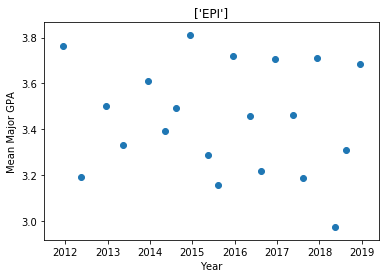

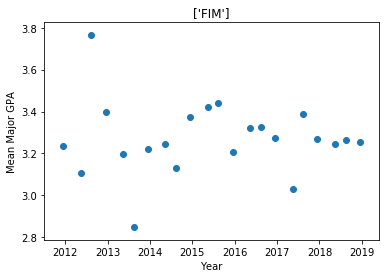

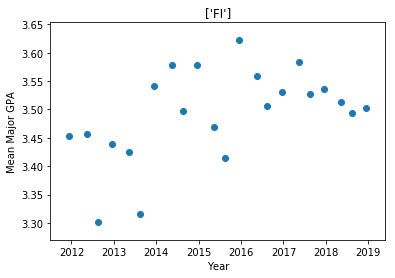

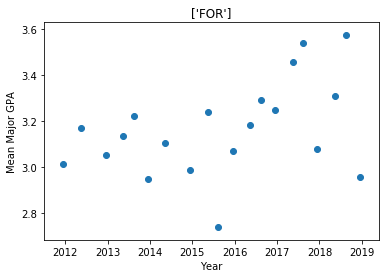

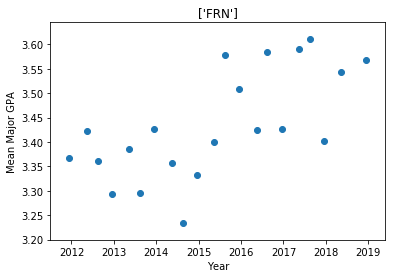

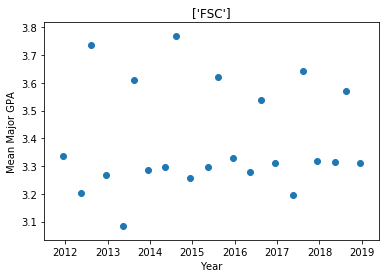

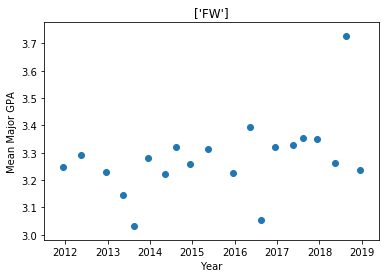

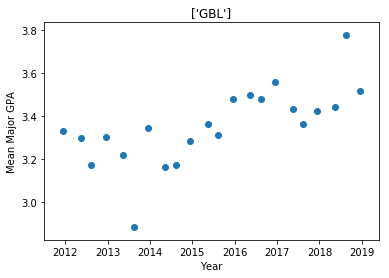

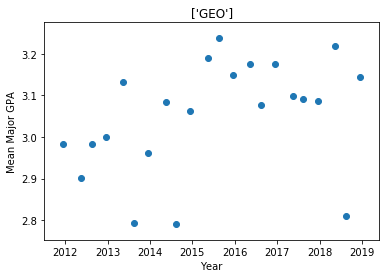

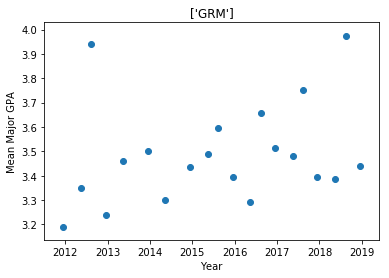

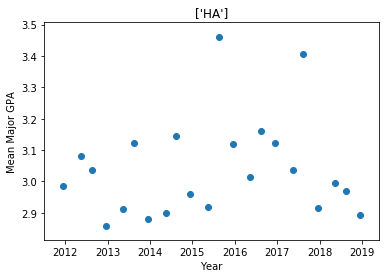

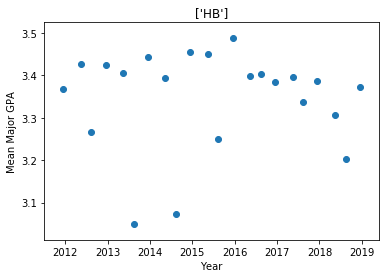

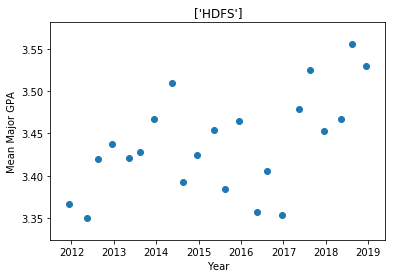

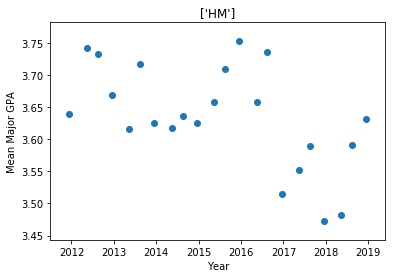

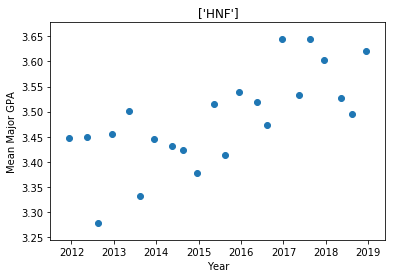

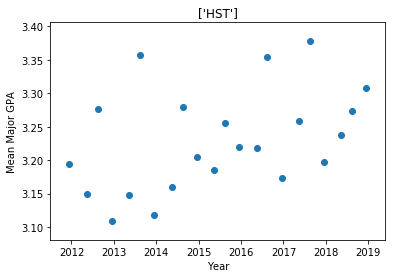

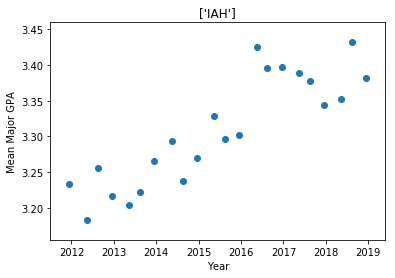

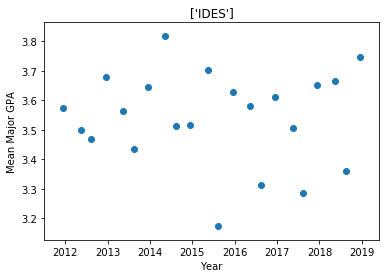

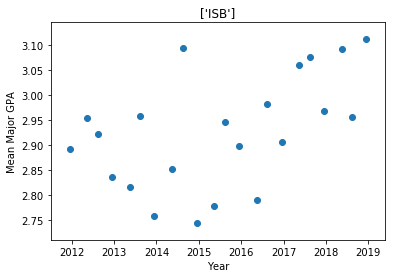

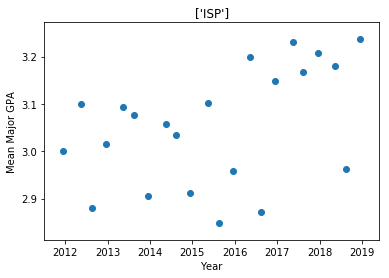

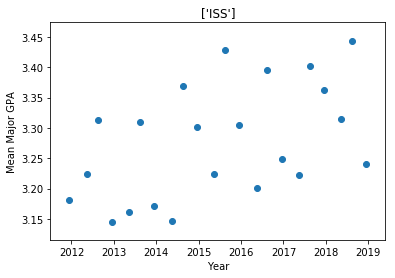

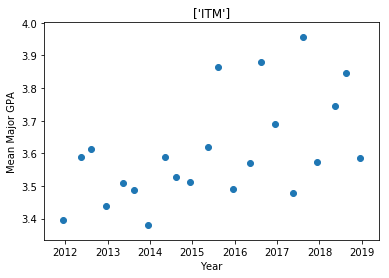

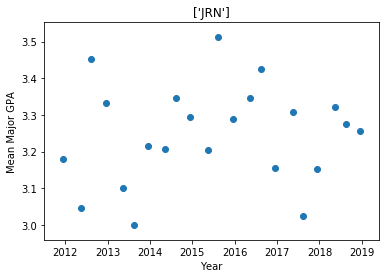

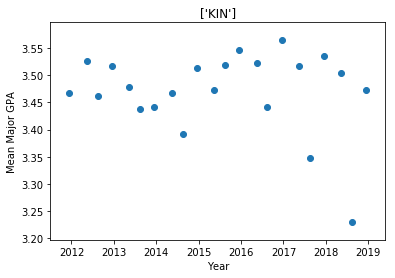

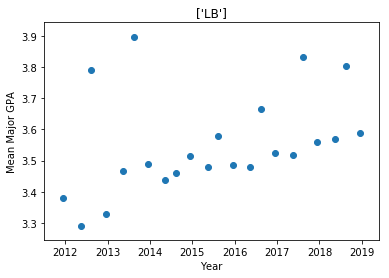

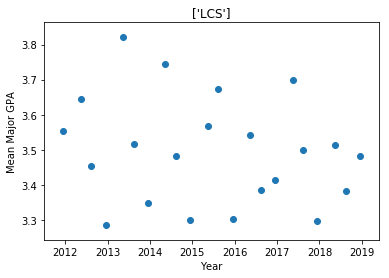

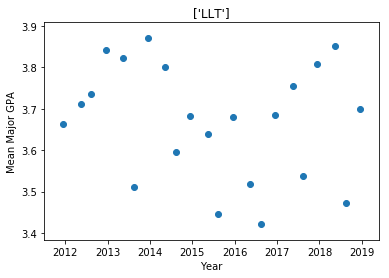

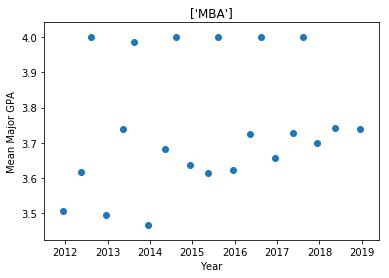

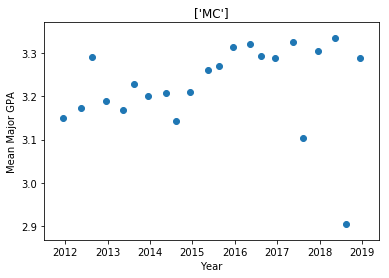

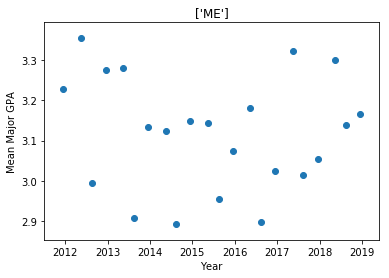

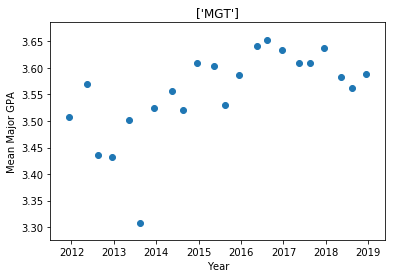

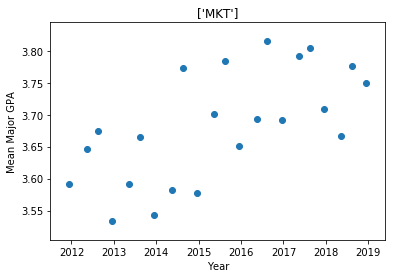

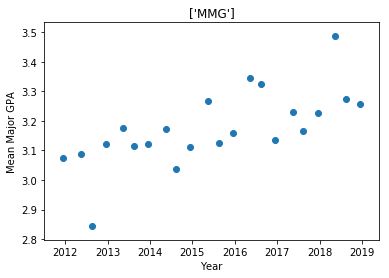

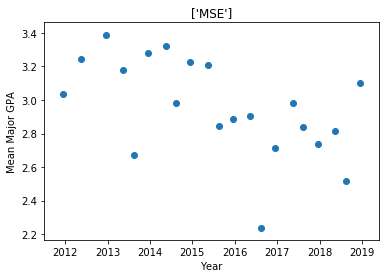

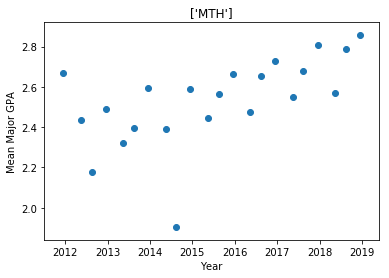

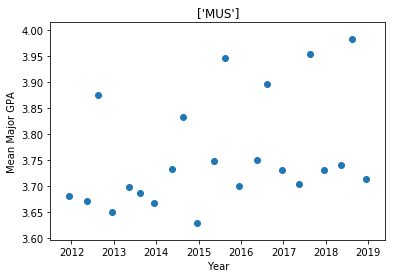

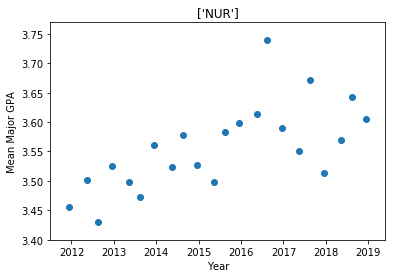

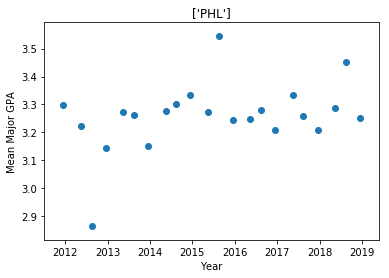

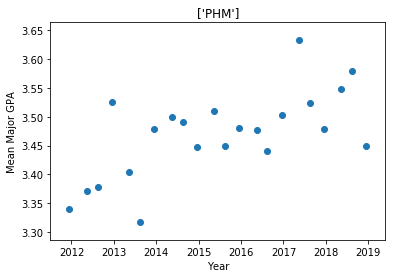

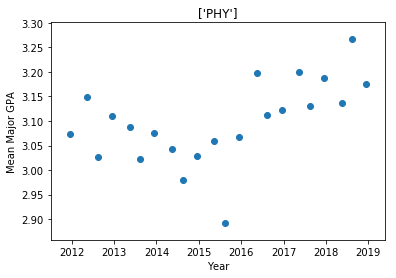

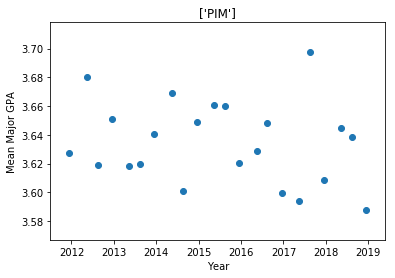

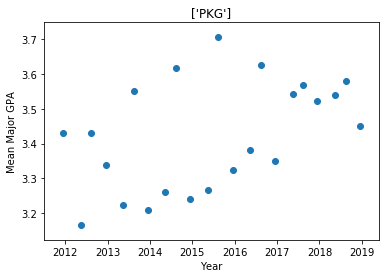

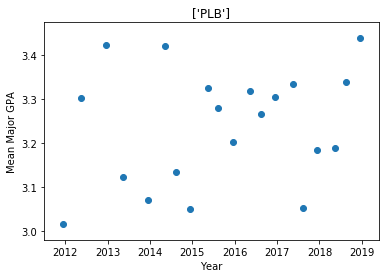

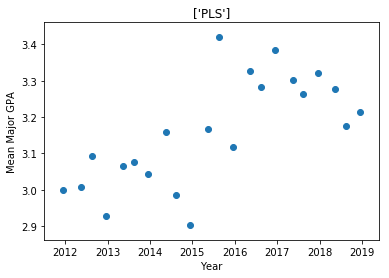

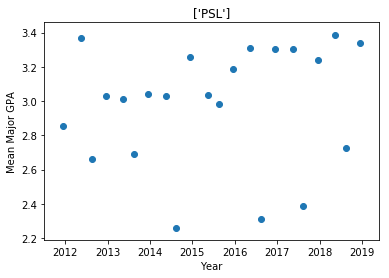

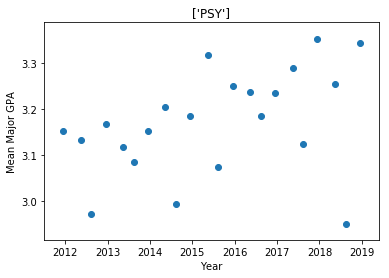

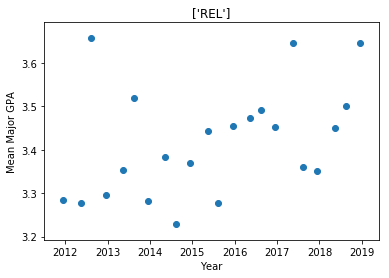

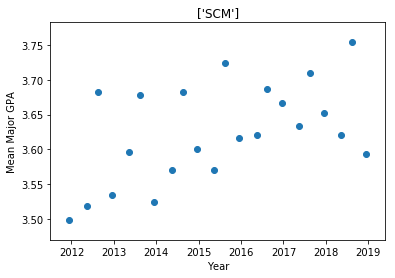

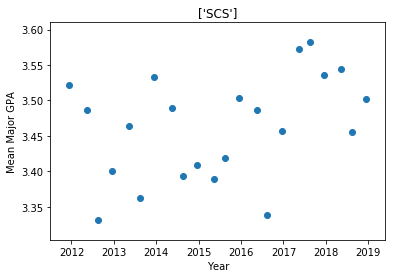

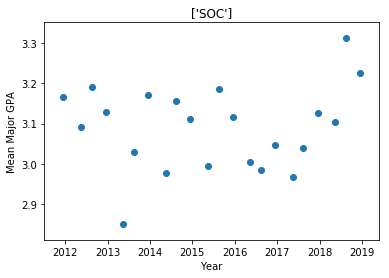

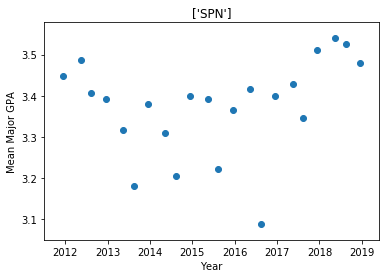

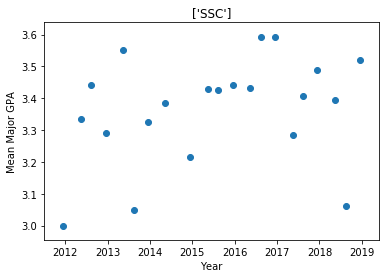

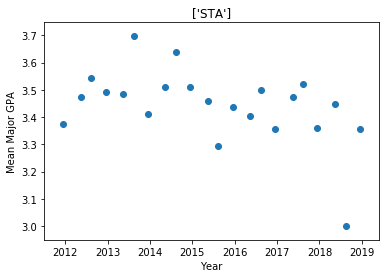

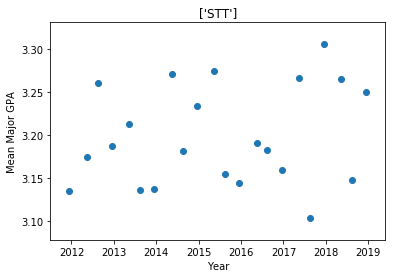

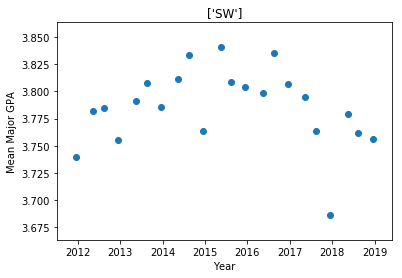

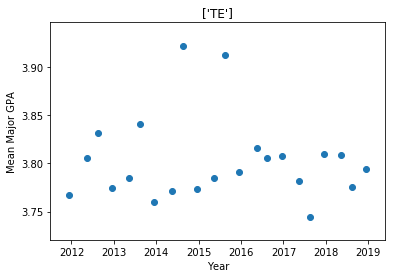

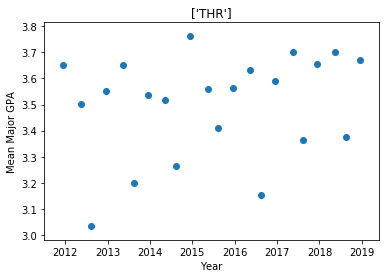

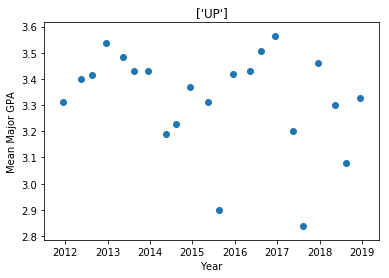

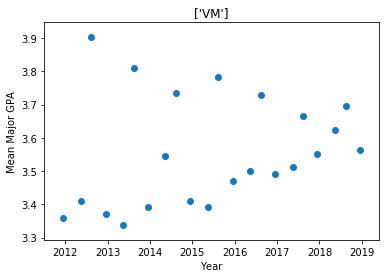

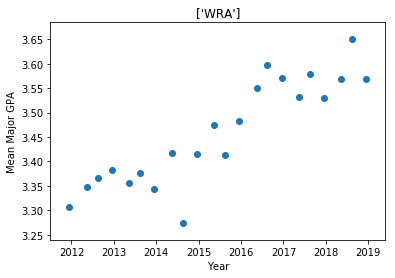

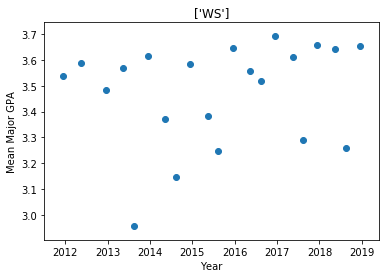

In [30]:

# finally, the code below saves each majors scatter plot of gpa over time

for index, i in enumerate(df_dict_course_means):

    plt.figure()
    
    plt.scatter(df_dict_course_means[str(i)]['date'], df_dict_course_means[str(i)]['mean'])
    plt.title(df_dict_course_means[str(i)]['course'].unique())
    plt.xlabel("Year")
    plt.ylabel("Mean Major GPA")
    plt.savefig('Mean GPA Graphs/_mean_plots{:s}.png'.format(i), dpi = 72)
    
    
   
    
